In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
agricolture_classes_shp = gpd.read_file('..\\resources\\analisi_spaziale\\Analisi_spaziale_8classi.shp')
agricolture_classes_shp.to_crs(epsg=4326, inplace=True)
agricolture_classes_shp.head()

,COD_ISTAT,NOME_COMUN,DESCR_CLAS,SHAPE_AREA,SHAPE_LEN,geometry
0,108011.0,BRIOSCO,Aree urbane (significative),6.690579e+06,17350.022072,"POLYGON ((9.26926 45.72612, 9.26791 45.72533, ..."
1,97090.0,VIGANO`,Aree urbane (significative),1.599047e+06,6590.536792,"POLYGON ((9.33714 45.71930, 9.33471 45.71779, ..."
2,98041.0,MULAZZANO,Aree rurali,1.553880e+07,29233.101668,"POLYGON ((9.42993 45.33754, 9.42929 45.33844, ..."
3,97021.0,CESANA BRIANZA,Aree urbane,3.445101e+06,13567.023026,"POLYGON ((9.30213 45.82974, 9.30215 45.82903, ..."
4,17109.0,MONIGA DEL GARDA,Aree rurali in contesti urbani,1.585893e+07,23883.668273,"POLYGON ((10.63382 45.53681, 10.63859 45.52002..."


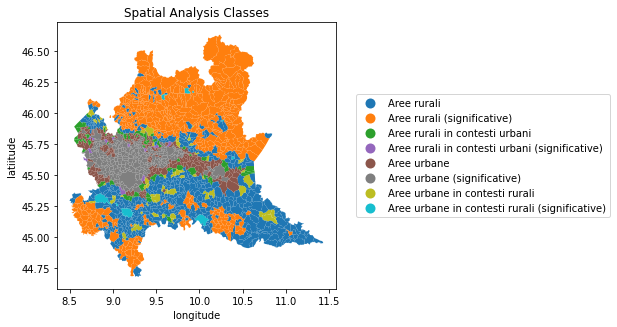

In [25]:
fig, ax = plt.subplots(1, figsize=(5,5))

agricolture_classes_shp.plot(column='DESCR_CLAS', legend=True, ax=ax, legend_kwds={'loc': 'right', 'bbox_to_anchor': (2, 0.5)})
ax.set_title('Spatial Analysis Classes')
ax.set_xlabel('longitude')
ax.set_ylabel('latiitude')
plt.show()

In [26]:
population_shp = gpd.read_file('..\\resources\\residenti\\residenti_2017.shp')
population_shp.to_crs(epsg=4326, inplace=True)
population_shp.head()

,BELFIORE,NOME_COM,ISTAT,NOME_PRO,POP_2017,NUM_ABIT_S,SHAPE_AREA,SHAPE_LEN,geometry
0,D963,GEMONIO,12074,VARESE,2871.0,779.845333,3.681499e+06,10308.156007,"POLYGON ((8.66396 45.86821, 8.66443 45.86874, ..."
1,B187,BRIOSCO,108011,MONZA E DELLA BRIANZA,6020.0,899.772638,6.690579e+06,17350.017958,"POLYGON ((9.23095 45.71764, 9.23096 45.71789, ..."
2,B212,BRUGHERIO,108012,MONZA E DELLA BRIANZA,34516.0,3358.658638,1.027672e+07,21722.000318,"POLYGON ((9.26829 45.55091, 9.26835 45.55102, ..."
3,D239,CUVIO,12063,VARESE,1655.0,282.163912,5.865385e+06,15574.874765,"POLYGON ((8.71522 45.89880, 8.71539 45.89883, ..."
4,B729,CARATE BRIANZA,108015,MONZA E DELLA BRIANZA,17860.0,1795.614502,9.946456e+06,20939.207352,"POLYGON ((9.21147 45.66473, 9.21142 45.66506, ..."


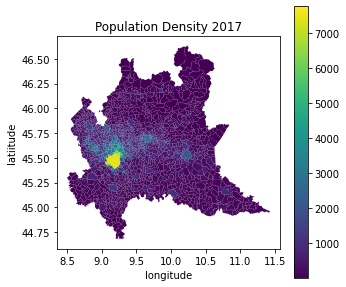

In [30]:
fig, ax = plt.subplots(1, figsize=(5,5))

population_shp.plot(column='NUM_ABIT_S', legend=True, ax=ax)

ax.set_title('Population Density 2017')
ax.set_xlabel('longitude')
ax.set_ylabel('latiitude')

plt.show()

In [35]:
comuni = gpd.read_file('..\\resources\\comuni\\coordinate\\comuni_shp\\features-points.shp')
comuni.head()

,Name,descriptio,geometry
0,Abbadia Cerreto,None,POINT (9.59416 45.31217)
1,Abbadia Lariana,None,POINT (9.33414 45.90048)
2,Abbiategrasso,None,POINT (8.91854 45.40077)
3,Acquafredda,None,POINT (10.41468 45.30738)
4,Acquanegra Cremonese,None,POINT (9.89087 45.17037)


In [31]:
import pandas as pd

agricolture_classes = pd.DataFrame(columns=['name', 'class' ])
agricolture_classes['name'] = agricolture_classes_shp['NOME_COMUN']
agricolture_classes['class'] = agricolture_classes_shp['DESCR_CLAS']
agricolture_classes.head()

,name,class
0,BRIOSCO,Aree urbane (significative)
1,VIGANO`,Aree urbane (significative)
2,MULAZZANO,Aree rurali
3,CESANA BRIANZA,Aree urbane
4,MONIGA DEL GARDA,Aree rurali in contesti urbani


In [32]:
pop_density = pd.DataFrame(columns=['name', 'pop_density' ])
pop_density['name'] = population_shp['NOME_COM']
pop_density['pop_density'] = population_shp['NUM_ABIT_S']
pop_density.head()

,name,pop_density
0,GEMONIO,779.845333
1,BRIOSCO,899.772638
2,BRUGHERIO,3358.658638
3,CUVIO,282.163912
4,CARATE BRIANZA,1795.614502


In [33]:
agricolture_classes['name'] = agricolture_classes['name'].apply(lambda name: name.upper())
pop_density['name'] = pop_density['name'].apply(lambda name: name.upper())

In [34]:
table = pd.merge(agricolture_classes, pop_density, how='inner', on=['name'])
table.head()

,name,class,pop_density
0,BRIOSCO,Aree urbane (significative),899.772638
1,VIGANO`,Aree urbane (significative),1304.204145
2,MULAZZANO,Aree rurali,369.140411
3,CESANA BRIANZA,Aree urbane,705.711411
4,MONIGA DEL GARDA,Aree rurali in contesti urbani,160.414322


In [41]:
comuni_shp = gpd.read_file('..\\resources\\comuni\\coordinate\\comuni_shp\\features-points.shp')
comuni_shp.to_crs(epsg=4326, inplace=True)
comuni_shp.head()

,Name,descriptio,geometry
0,Abbadia Cerreto,None,POINT (9.59416 45.31217)
1,Abbadia Lariana,None,POINT (9.33414 45.90048)
2,Abbiategrasso,None,POINT (8.91854 45.40077)
3,Acquafredda,None,POINT (10.41468 45.30738)
4,Acquanegra Cremonese,None,POINT (9.89087 45.17037)


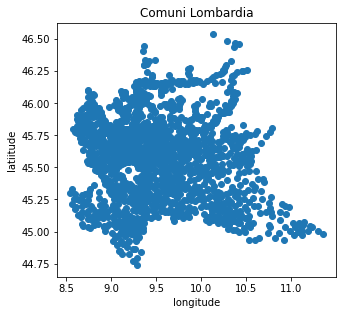

In [42]:
fig, ax = plt.subplots(1, figsize=(5,5))

comuni_shp.plot(ax=ax)

ax.set_title('Comuni Lombardia')
ax.set_xlabel('longitude')
ax.set_ylabel('latiitude')

plt.show()


In [43]:
comuni_coords = pd.DataFrame(columns=['name', 'latitude', 'longitude'])
comuni_coords['name'] = comuni_shp['Name']
comuni_coords['point'] = comuni_shp['geometry']
comuni_coords.head()

,name,latitude,longitude,point
0,Abbadia Cerreto,NaN,NaN,POINT (9.59416 45.31217)
1,Abbadia Lariana,NaN,NaN,POINT (9.33414 45.90048)
2,Abbiategrasso,NaN,NaN,POINT (8.91854 45.40077)
3,Acquafredda,NaN,NaN,POINT (10.41468 45.30738)
4,Acquanegra Cremonese,NaN,NaN,POINT (9.89087 45.17037)


In [44]:
comuni_coords['longitude'] = comuni_coords['point'].apply(lambda point: round(float(point.bounds[0]), 2))
comuni_coords['latitude'] = comuni_coords['point'].apply(lambda point: round(float(point.bounds[1]), 2))
comuni_coords.drop(columns='point', inplace=True)
comuni_coords.head()

,name,latitude,longitude
0,Abbadia Cerreto,45.31,9.59
1,Abbadia Lariana,45.90,9.33
2,Abbiategrasso,45.40,8.92
3,Acquafredda,45.31,10.41
4,Acquanegra Cremonese,45.17,9.89


In [45]:
comuni_coords['name'] = comuni_coords['name'].apply(lambda name: name.upper())

In [46]:
table = pd.merge(table, comuni_coords, how='inner', on=['name'])
table.head()

,name,class,pop_density,latitude,longitude
0,BRIOSCO,Aree urbane (significative),899.772638,45.71,9.24
1,MULAZZANO,Aree rurali,369.140411,45.37,9.40
2,CESANA BRIANZA,Aree urbane,705.711411,45.82,9.30
3,MONIGA DEL GARDA,Aree rurali in contesti urbani,160.414322,45.53,10.54
4,MONTICELLI BRUSATI,Aree urbane in contesti rurali,417.215618,45.63,10.10


In [47]:
population_shp['class'] = np.nan
population_shp['weighted_class'] = np.nan

In [48]:
for i in range(len(population_shp)):

    name = population_shp['NOME_COM'][i]
    agr_class = table[table['name'] == name]['class']

    if len(agr_class) > 0:
        
        population_shp['class'][i] = agr_class.item()  
        population_shp['weighted_class'][i] = population_shp['NUM_ABIT_S'][i] if agr_class.item().lower() == 'aree rurali' else np.nan

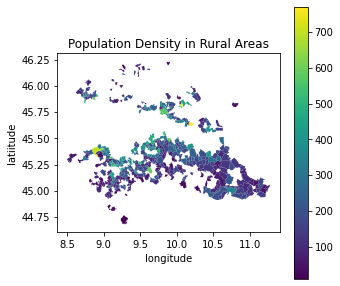

In [49]:
fig, ax = plt.subplots(1, figsize=(5,5))

population_shp.plot(column='weighted_class', legend=True, ax=ax)

ax.set_title('Population Density in Rural Areas')
ax.set_xlabel('longitude')
ax.set_ylabel('latiitude')

plt.show()